In [1]:
using LinearAlgebra
using BenchmarkTools
using Plots
using SparseArrays
using LinearSolve

In [2]:
function LU_pre(m::Tridiagonal{Float64, Vector{Float64}})
    return lu(m)
end

function LU_calc(lu::LU{Float64, Tridiagonal{Float64, Vector{Float64}}, Vector{Int64}}, f::Vector{Float64})
    return lu\f
end

function backslash(m::Tridiagonal{Float64, Vector{Float64}}, f::Vector{Float64})
    return m\f
end

backslash (generic function with 1 method)

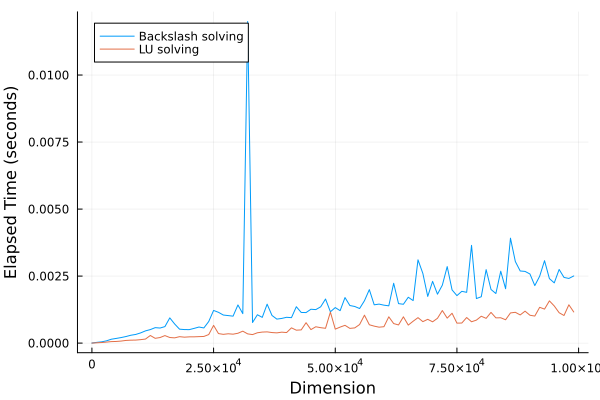

In [3]:
function solve_and_write_time(n)
    vector = rand(n);

    #generating the low, high and main diagonal of a tridiagonal matrix
    hd = rand(n-1);
    ld = rand(n-1);
    d = rand(n)

    matrix = Tridiagonal(ld,d,hd)
    ret = zeros(2)

    # Measure the time to solve the linear system
    elapsed_time_backslash = @elapsed begin
        x = backslash( matrix , vector)
    end
    ret[1] = elapsed_time_backslash

    luMat = LU_pre(matrix)
    elapsed_time_LU = @elapsed begin
        x = LU_calc(luMat, vector)
    end
    ret[2] = elapsed_time_LU

    return ret
end

# Set the dimensions for the loop (e.g., from 1 to 1000 with a step of 2)
dimensions = 1:1000:100000
times_backslash = []
times_LU = []

# Solve linear systems and collect elapsed times
for n in dimensions
    time = solve_and_write_time(n)
    push!(times_backslash, time[1])
    push!(times_LU, time[2])
end

# Plot the graph
plot(dimensions, times_backslash, xlabel="Dimension", ylabel="Elapsed Time (seconds)", label="Backslash solving", legend=:topleft)
plot!(dimensions, times_LU, label="LU solving")